# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Exploratory Data Analysis 

In [3]:
data = pd.read_csv('data/Advertising.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [4]:
data.shape

(200, 4)

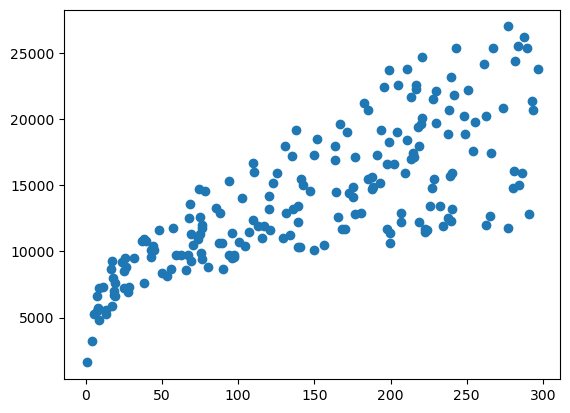

In [5]:
plt.scatter(data['TV'], data['sales'])

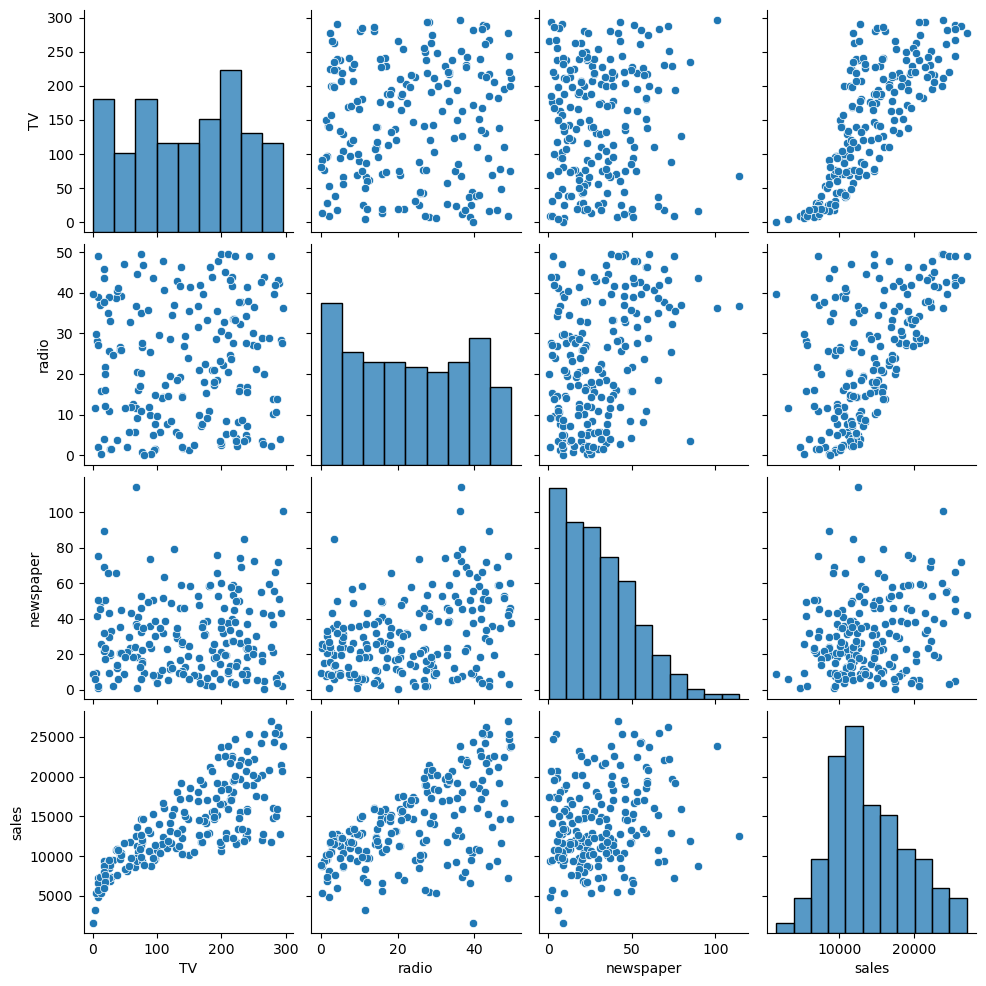

In [6]:
import seaborn as sns
sns.pairplot(data);

In [7]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

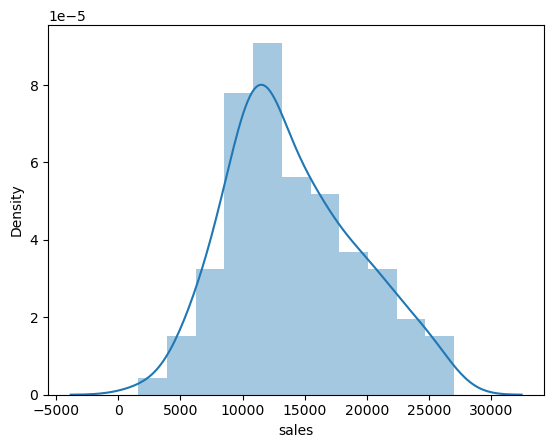

In [8]:
sns.distplot(data.sales)

# Model
## LinearRegression

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['sales']),
                                                    data['sales'],
                                                    test_size = 0.20,
                                                   random_state=42) 

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

print('MSE', mean_squared_error(preds, y_test))
print('RMSE', np.sqrt(mean_squared_error(preds, y_test)))

MSE 3174097.3539761035
RMSE 1781.59966153345


In [11]:
lr.coef_

array([ 44.72951747, 189.19505423,   2.76111434])

## Ridge

In [26]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)

ridge = Ridge(0.01)
ridge.fit(X_train2, y_train)

preds = ridge.predict(scaler.transform(X_test))
print('MSE', mean_squared_error(preds, y_test))
print('RMSE', np.sqrt(mean_squared_error(preds, y_test)))

MSE 3174290.1302275266
RMSE 1781.6537627237024


In [27]:
ridge.coef_

array([3763.96980806, 2792.1151861 ,   56.05063368])

## Lasso

In [29]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)

laso = Lasso()
laso.fit(X_train2, y_train)

preds = laso.predict(scaler.transform(X_test))
print('MSE', mean_squared_error(preds, y_test))
print('RMSE', np.sqrt(mean_squared_error(preds, y_test)))

MSE 3174052.775549777
RMSE 1781.5871507029278


## ElasticNet

In [30]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)

elastic = ElasticNet()
elastic.fit(X_train2, y_train)

preds = elastic.predict(scaler.transform(X_test))
print('MSE', mean_squared_error(preds, y_test))
print('RMSE', np.sqrt(mean_squared_error(preds, y_test)))

MSE 6756186.441685321
RMSE 2599.2665199408316


In [35]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'alpha': [1e-10, 1e-4, 1e-2, 1, 5, 10, 20, 40],
    'l1_ratio': np.arange(0, 1, 0.01)
}

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)


elastic = ElasticNet()
elastic2 = GridSearchCV(elastic, parameters)

elastic2.fit(X_train2, y_train)

C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.533e+08, tolerance: 3.381e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.935e+08, tolerance: 3.397e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.535e+08, tolerance: 3.381e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.937e+08, tolerance: 3.397e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.415e+09, tolerance: 3.381e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Rafa\anaconda3\envs\general\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.415e+09, tolerance: 3.397e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-10, 0.0001, 0.01, 1, 5, 10, 20, 40],
                         'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])})

In [36]:
elastic2.best_params_

{'alpha': 1, 'l1_ratio': 0.99}

In [37]:
preds = elastic2.predict(scaler.transform(X_test))
print('MSE', mean_squared_error(preds, y_test))
print('RMSE', np.sqrt(mean_squared_error(preds, y_test)))

MSE 3206998.8873949726
RMSE 1790.8095620123802
